In [ ]:
# Import the necessary packages
import argparse
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import functools

# Construct the argument parser and parse the arguments

# Read the image and convert to grayscale
image = cv2.imread("/content/test_images/bz55_jpg.rf.530decdda9e06c7af61f364545a894ed.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

array([[[185, 180, 177],
        [185, 180, 177],
        [186, 181, 178],
        ...,
        [184, 173, 169],
        [184, 173, 169],
        [184, 173, 169]],

       [[172, 167, 164],
        [172, 167, 164],
        [172, 167, 164],
        ...,
        [186, 175, 171],
        [186, 175, 171],
        [186, 175, 171]],

       [[210, 205, 202],
        [209, 204, 201],
        [208, 203, 200],
        ...,
        [188, 177, 173],
        [188, 177, 173],
        [188, 177, 173]],

       ...,

       [[201, 196, 193],
        [201, 196, 193],
        [201, 196, 193],
        ...,
        [185, 180, 177],
        [185, 180, 177],
        [185, 180, 177]],

       [[202, 197, 194],
        [202, 197, 194],
        [202, 197, 194],
        ...,
        [188, 183, 180],
        [188, 183, 180],
        [188, 183, 180]],

       [[202, 197, 194],
        [202, 197, 194],
        [202, 197, 194],
        ...,
        [189, 184, 181],
        [189, 184, 181],
        [189, 184, 181]]], dtype=uint8)
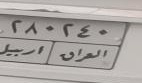

In [ ]:
image

array([[180, 180, 181, ..., 173, 173, 173],
       [167, 167, 167, ..., 175, 175, 175],
       [205, 204, 203, ..., 177, 177, 177],
       ...,
       [196, 196, 196, ..., 180, 180, 180],
       [197, 197, 197, ..., 183, 183, 183],
       [197, 197, 197, ..., 184, 184, 184]], dtype=uint8)
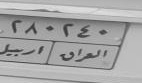

In [ ]:

gray


In [ ]:
# Apply Gaussian blurring and thresholding
# to reveal the characters on the license plate
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13 ,13)

array([[255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
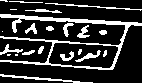

In [ ]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
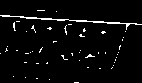

In [ ]:
kernel = np.ones((3, 3), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(thresh, kernel, iterations=1)
img_erosion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
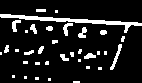

In [ ]:
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
img_dilation

In [ ]:
vertical_hist = np.sum(img_dilation,axis=0,keepdims=True)/100



vertical_hist

array([[15.3 , 17.85, 10.2 , 10.2 , 17.85, 25.5 , 30.6 , 28.05, 25.5 ,
        10.2 , 10.2 ,  7.65, 33.15, 43.35, 43.35, 45.9 , 30.6 , 22.95,
        22.95, 17.85, 17.85, 10.2 , 10.2 , 17.85, 33.15, 40.8 , 40.8 ,
        33.15, 17.85, 20.4 , 25.5 , 33.15, 33.15, 38.25, 35.7 , 40.8 ,
        43.35, 33.15, 40.8 , 38.25, 35.7 , 35.7 , 30.6 , 25.5 , 17.85,
        25.5 , 28.05, 28.05, 40.8 , 30.6 , 30.6 , 22.95, 28.05, 17.85,
        17.85, 22.95, 25.5 , 25.5 , 10.2 , 10.2 , 17.85, 20.4 , 25.5 ,
        35.7 , 51.  , 48.45, 45.9 , 40.8 , 25.5 , 17.85, 22.95, 28.05,
        28.05, 25.5 , 12.75, 15.3 , 15.3 , 15.3 , 38.25, 48.45, 43.35,
        30.6 , 35.7 , 33.15, 40.8 , 40.8 , 35.7 , 30.6 , 30.6 , 28.05,
        20.4 , 20.4 , 20.4 , 17.85, 17.85, 17.85, 10.2 , 20.4 , 28.05,
        28.05, 25.5 , 30.6 , 22.95, 22.95, 33.15, 28.05, 28.05, 10.2 ,
        10.2 , 10.2 , 17.85, 20.4 , 25.5 , 30.6 , 33.15, 30.6 , 33.15,
        30.6 , 38.25, 35.7 , 28.05, 28.05, 22.95, 22.95, 22.95, 28.05,
      

In [ ]:
print(np.max(vertical_hist))


51.0


In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

47.0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
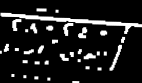

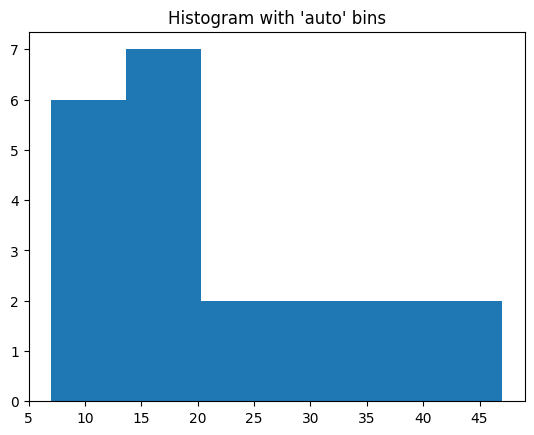

In [ ]:
rotate=rotate_image(img_dilation, -1)
rotate
vertical_hist = np.sum(rotate,axis=0,keepdims=True)/100

import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack(np.histogram(vertical_hist))
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")


np.histogram(vertical_hist)
print(np.max(vertical_hist))
rotate

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
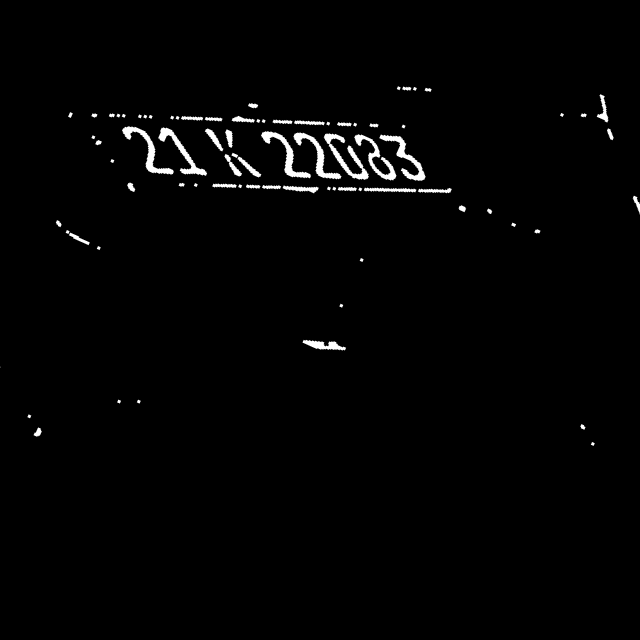

In [ ]:
rotate

In [ ]:
# Perform connected components analysis on the thresholded image and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(img_dilation)
mask = np.zeros(thresh.shape, dtype="uint8")

In [ ]:
# Set lower bound and upper bound criteria for characters
total_pixels = img_dilation.shape[0] * img_dilation.shape[1]
lower = 20 # heuristic param, can be fine tuned if necessary
upper = 10000 # heuristic param, can be fine tuned if necessary

In [ ]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue

    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # If the number of pixels in the component is between lower bound and upper bound,
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

In [ ]:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

In [ ]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [ ]:
boundingBoxes

[]

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,977 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
! pip install Pillow
! pip install pytesseract

In [ ]:
# Load languages and scripts
!git clone --recurse-submodules https://github.com/tesseract-ocr/tessdata_fast.git 2> /dev/null || (cd tessdata_fast; git pull)
!cp tessdata_fast/*.traineddata /usr/share/tesseract-ocr/4.00/tessdata/
!cp -r tessdata_fast/script /usr/share/tesseract-ocr/4.00/tessdata/

Submodule path 'tessconfigs': checked out '3decf1c8252ba6dbeef0bf908f4b0aab7f18d113'


In [ ]:
# import the necessary packages
from pytesseract import Output
import pytesseract
import argparse
import imutils
import cv2
from PIL import Image
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to determine the text orientation
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)
image = cv2.imread("/content/hh.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_osd(image, output_type='dict')
print(results)


TesseractError: (1, 'Tesseract Open Source OCR Engine v4.1.1 with Leptonica Warning: Invalid resolution 0 dpi. Using 70 instead. Estimating resolution as 533 Too few characters. Skipping this page Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

In [ ]:
pip install deskew

In [ ]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate

from deskew import determine_skew

image = io.imread('input.jpg')
grayscale = rgb2gray(image)
angle = determine_skew(grayscale)
rotated = rotate(image, angle, resize=True) * 255
io.imsave('output.png', rotated.astype(np.uint8))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
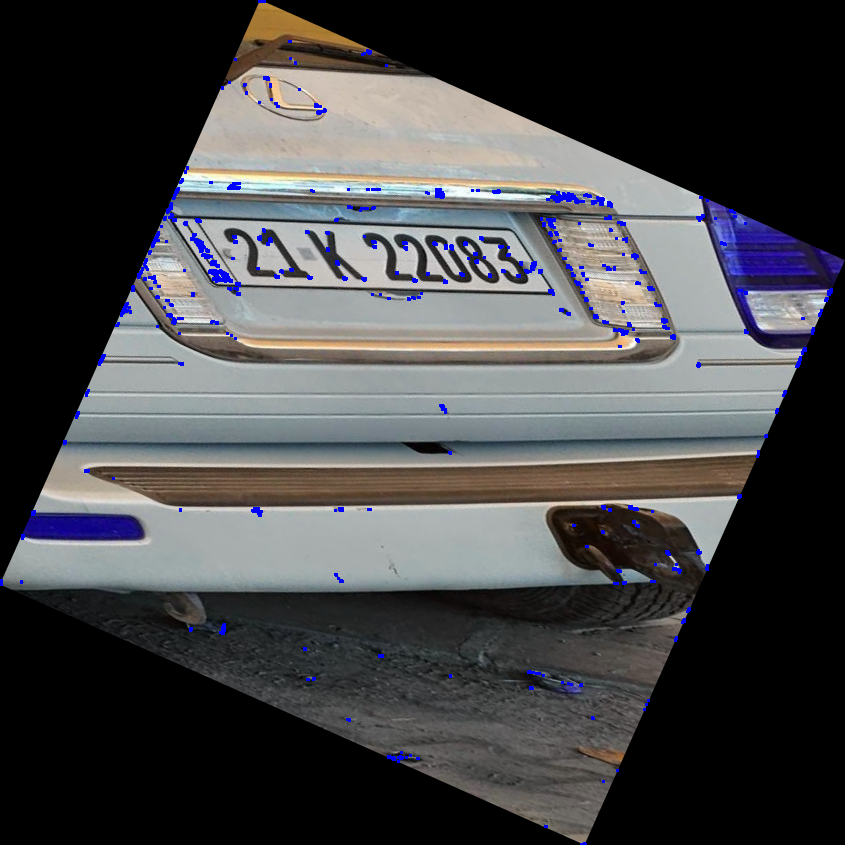

In [ ]:
import numpy as np
import cv2 as cv

filename = 'output.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

img


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Loading the image
img = cv2.imread('./output.png')

# preprocess the image
gray_img = cv2.cvtColor(img ,
						cv2.COLOR_BGR2GRAY)

# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)
cv2_imshow(blurred)
# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(threshold)
# Apply the Component analysis function
output = cv2.connectedComponentsWithStats(
	img_dilation, 100, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output
print(numLabels)

# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")

# Loop through each component
for i in range(1, totalLabels):

	# Area of the component
	area = values[i, cv2.CC_STAT_AREA]

	if (area > 140) and (area < 400):
		# Create a new image for bounding boxes
		new_img=img.copy()

		# Now extract the coordinate points
		x1 = values[i, cv2.CC_STAT_LEFT]
		y1 = values[i, cv2.CC_STAT_TOP]
		w = values[i, cv2.CC_STAT_WIDTH]
		h = values[i, cv2.CC_STAT_HEIGHT]

		# Coordinate of the bounding box
		pt1 = (x1, y1)
		pt2 = (x1+ w, y1+ h)
		(X, Y) = centroid[i]

		# Bounding boxes for each component
		cv2.rectangle(new_img,pt1,pt2,
					(0, 255, 0), 3)
		cv2.circle(new_img, (int(X),
							int(Y)),
				4, (0, 0, 255), -1)

		# Create a new array to show individual component
		component = np.zeros(gray_img.shape, dtype="uint8")
		componentMask = (label_ids == i).astype("uint8") * 255

		# Apply the mask using the bitwise operator
		component = cv2.bitwise_or(component,componentMask)
		output = cv2.bitwise_or(output, componentMask)

		# Show the final images
		cv2_imshow( new_img)
		cv2_imshow( component)
		cv2_imshow( output)
		cv2.waitKey(0)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# edges

In [ ]:
import cv2
import numpy as np

def detect_license_plate_corners(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge detection
    edges = cv2.Canny(gray, 50, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find potential license plates
    license_plate_contour = None
    for contour in contours:
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:  # Check for quadrilateral
            license_plate_contour = approx
            break

    if license_plate_contour is None:
        raise ValueError("No license plate contour detected.")

    # Extract corner points
    corners = license_plate_contour.reshape(4, 2)

    return corners

# Example usage
image_path = '/content/519_jpg.rf.07b1780b24590e3840b9c3d00b3500042.jpg'
corners = detect_license_plate_corners(image_path)

print("Detected corners:", corners)
visualize_corners(image_path, corners)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


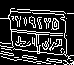

In [ ]:
import cv2
import numpy as np

def visualize_canny_edges(image_path, low_threshold=50, high_threshold=150):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)

    # Display the original and edge-detected images side by side
    combined_image = np.hstack((gray_image, edges))

    # Add text labels to differentiate between original and edge-detected images
    cv2.putText(combined_image, 'Original', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(combined_image, 'Edges', (gray_image.shape[1] + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show the combined image
    cv2_imshow(edges)
    cv2.imwrite('canny_edges.png', edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = '/content/pic1.jpg'  # Replace with your image path
visualize_canny_edges(image_path)


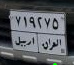

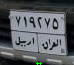

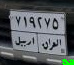

<ipython-input-39-abcae66b0b96>:26: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


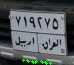

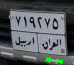

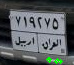

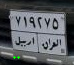

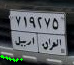

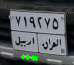

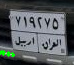

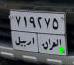

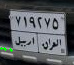

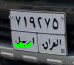

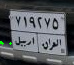

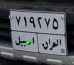

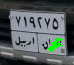

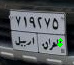

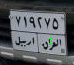

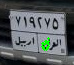

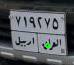

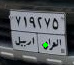

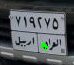

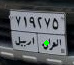

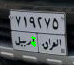

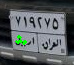

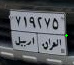

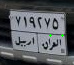

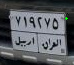

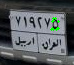

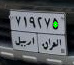

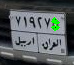

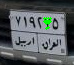

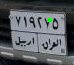

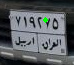

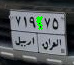

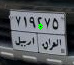

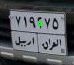

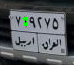

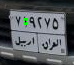

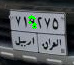

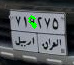

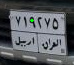

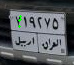

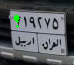

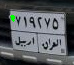

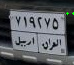

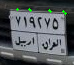

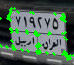

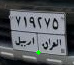

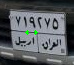

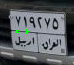

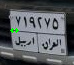

[[[11  8]]

 [[10  9]]

 [[10 13]]

 [[ 8 15]]

 [[ 8 17]]

 [[ 7 18]]

 [[ 0 18]]

 [[ 8 18]]

 [[10 20]]

 [[10 29]]

 [[11 30]]

 [[11 40]]

 [[12 41]]

 [[12 45]]

 [[13 46]]

 [[12 47]]

 [[ 7 47]]

 [[ 6 46]]

 [[ 1 46]]

 [[ 0 45]]

 [[ 1 46]]

 [[ 6 46]]

 [[ 7 47]]

 [[12 47]]

 [[13 46]]

 [[12 45]]

 [[12 41]]

 [[11 40]]

 [[11 32]]

 [[12 31]]

 [[16 31]]

 [[17 32]]

 [[26 32]]

 [[27 33]]

 [[34 33]]

 [[36 35]]

 [[36 46]]

 [[37 47]]

 [[37 50]]

 [[36 51]]

 [[28 51]]

 [[27 50]]

 [[22 50]]

 [[21 49]]

 [[15 49]]

 [[14 48]]

 [[13 49]]

 [[14 48]]

 [[15 49]]

 [[21 49]]

 [[22 50]]

 [[27 50]]

 [[28 51]]

 [[36 51]]

 [[37 52]]

 [[37 53]]

 [[39 53]]

 [[40 52]]

 [[46 52]]

 [[47 53]]

 [[53 53]]

 [[54 54]]

 [[62 54]]

 [[63 53]]

 [[66 56]]

 [[67 55]]

 [[68 56]]

 [[68 58]]

 [[67 59]]

 [[68 58]]

 [[70 58]]

 [[69 58]]

 [[68 57]]

 [[70 55]]

 [[73 55]]

 [[70 55]]

 [[69 56]]

 [[68 56]]

 [[67 55]]

 [[66 56]]

 [[65 55]]

 [[65 54]]

 [[66 53]]

 [[6

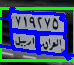

In [ ]:
import cv2
import numpy as np

def find_license_plate_box(edge_image):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize variables to hold the largest contour
    largest_contour = None
    largest_area = 0

    # Loop through all detected contours
    for contour in contours:
        # Calculate the area of the contour
        image = cv2.imread('/content/pic1.jpg')
        cv2.drawContours(image, contour, -1, (0, 255, 0), 2)

        # Display the original image with contours
        cv2_imshow(image)
        area = cv2.contourArea(contour)

        # Consider contours that are reasonably large and have four corners
        if area > largest_area:
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)

            largest_contour = contour
            largest_area = area

    # Check if a contour was found
    if largest_contour is not None:
        print(largest_contour)
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(largest_contour)
        return (x, y, w, h), largest_contour
    else:
        raise ValueError("No suitable license plate contour detected.")

def visualize_license_plate_box(image_path, edge_image):
    # Load the original image
    image = cv2.imread(image_path)

    # Find the bounding box of the license plate
    bounding_box, contour = find_license_plate_box(edge_image)
    x, y, w, h = bounding_box

    # Draw the bounding box on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw the contour
    cv2.drawContours(image, [contour], -1, (255, 0, 0), 2)

    # Display the result
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
edge_image_path = '/content/canny_edges.png'  # Replace with the path to your edge-detected image
image_path = '/content/pic1.jpg'  # Replace with the path to your original image

# Load edge-detected image
edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)

visualize_license_plate_box(image_path, edge_image)


<ipython-input-40-4bf4969ac405>:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
<ipython-input-40-4bf4969ac405>:71: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(cv2.transform(np.array([box]), rotation_matrix)[0])


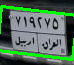

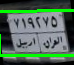

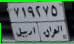

In [ ]:
import cv2
import numpy as np

def find_license_plate_min_area_rect(edge_image):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    largest_area = 0
    largest_contour = None

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > largest_area:
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            largest_contour = contour
            largest_area = area

    if largest_contour is not None:
        return box, rect
    else:
        raise ValueError("No suitable license plate contour detected.")

def rotate_and_crop(image, rect):
    width, height = int(rect[1][0]), int(rect[1][1])
    angle = rect[2]
    # angle=90-angle
    # print(angle)
    # angle=90-angle
    center = rect[0]

    # Compute the rotation matrix to align the rectangle horizontally
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate the entire image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    # Calculate new bounding box coordinates in the rotated image
    x = int(center[0] - width / 2)
    y = int(center[1] - height / 2)

    # Clamp coordinates to be within image boundaries
    x = max(0, min(x, rotated_image.shape[1] - width))
    y = max(0, min(y, rotated_image.shape[0] - height))
    width = min(width, rotated_image.shape[1] - x)
    height = min(height, rotated_image.shape[0] - y)

    # Crop the aligned rectangle from the rotated image
    cropped_image = rotated_image[y:y + height, x:x + width]

    return cropped_image, rotated_image, rotation_matrix

def crop_and_save_license_plate(image_path, edge_image_path, save_path):
    image = cv2.imread(image_path)
    edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)

    # Find the minimum area rectangle of the license plate
    box, rect = find_license_plate_min_area_rect(edge_image)

    # Rotate and crop the image based on the aligned rectangle
    cropped_image, rotated_image, rotation_matrix = rotate_and_crop(image, rect)

    # Save the cropped image
    cv2.imwrite(save_path, cropped_image)

    # Draw the bounding box on the original and rotated image for visualization
    cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

    # Apply the same rotation to the original box points for visualization
    box = np.int0(cv2.transform(np.array([box]), rotation_matrix)[0])
    cv2.drawContours(rotated_image, [box], 0, (0, 255, 0), 2)

    # Display the result
    cv2_imshow( image)
    cv2_imshow(rotated_image)
    cv2_imshow( cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Example usage
edge_image_path = '/content/canny_edges.png'  # Path to the edge-detected image
original_image_path = '/content/pic1.jpg'  # Path to the original image
save_path = '/content/cropped3.jpg'  # Path to save the cropped image

# Load edge-detected image
edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)

# Crop and save the license plate
crop_and_save_license_plate(original_image_path, edge_image_path, save_path)

In [ ]:
def detect_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect corners using Shi-Tomasi method
    corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 10)
    corners = np.int0(corners)

    # Extract corner points
    corner_points = []
    for corner in corners:
        x, y = corner.ravel()
        corner_points.append([x, y])

    return np.array(corner_points, dtype=np.float32)

# Example usage
corners = detect_features(image_path)

print("Detected corners:", corners)
visualize_corners(image_path, corners)

Detected corners: [[54. 18.]
 [45. 46.]
 [41. 18.]
 [12. 30.]]


<ipython-input-9-5cce3c8a1ee9>:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


NameError: name 'visualize_corners' is not defined

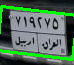

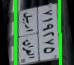

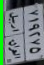

In [ ]:
import cv2
import numpy as np

def find_license_plate_min_area_rect_with_coverage(edge_image, min_coverage=0.75, max_iterations=10):
    contours, _ = cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    largest_area = 0
    best_rect = None
    best_box = None

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > largest_area:
            original_length = len(contour)
            for i in range(max_iterations):
                epsilon = i * cv2.arcLength(contour, True) / (max_iterations - 1)
                approx_contour = cv2.approxPolyDP(contour, epsilon, True)

                # Check if the simplified contour covers at least the required percentage
                if len(approx_contour) >= min_coverage * original_length:
                    rect = cv2.minAreaRect(approx_contour)
                    box = cv2.boxPoints(rect)
                    box = np.intp(box)

                    largest_area = area
                    best_rect = rect
                    best_box = box
                    break

    if best_rect is not None:
        return best_box, best_rect
    else:
        raise ValueError("No suitable license plate contour detected.")

def rotate_and_crop_vertically(image, rect):
    width, height = int(rect[1][0]), int(rect[1][1])
    angle = rect[2]
    center = rect[0]

    # Adjust angle for vertical alignment
    if width > height:
        angle -= 90

    # Compute the rotation matrix to align the rectangle vertically
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate the entire image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    # Calculate new bounding box coordinates in the rotated image
    x = int(center[0] - height / 2)
    y = int(center[1] - width / 2)

    # Clamp coordinates to be within image boundaries
    x = max(0, min(x, rotated_image.shape[1] - height))
    y = max(0, min(y, rotated_image.shape[0] - width))
    height = min(height, rotated_image.shape[1] - x)
    width = min(width, rotated_image.shape[0] - y)

    # Crop the aligned rectangle from the rotated image
    cropped_image = rotated_image[y:y + width, x:x + height]

    # Check if the cropped image is valid
    if cropped_image.size == 0:
        raise ValueError("Cropped image is empty, likely due to invalid coordinates or dimensions.")

    return cropped_image, rotated_image, rotation_matrix

def crop_and_save_license_plate_vertically(image_path, edge_image_path, save_path, min_coverage=0.75):
    image = cv2.imread(image_path)
    edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)

    # Find the minimum area rectangle of the license plate with contour simplification
    box, rect = find_license_plate_min_area_rect_with_coverage(edge_image, min_coverage)

    # Rotate and crop the image based on the aligned rectangle
    cropped_image, rotated_image, rotation_matrix = rotate_and_crop_vertically(image, rect)

    # Save the cropped image
    cv2.imwrite(save_path, cropped_image)

    # Draw the bounding box on the original and rotated image for visualization
    cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

    # Apply the same rotation to the original box points for visualization
    box = np.intp(cv2.transform(np.array([box]), rotation_matrix)[0])
    cv2.drawContours(rotated_image, [box], 0, (0, 255, 0), 2)

    # Display the result
    cv2_imshow(image)
    cv2_imshow(rotated_image)
    cv2_imshow(cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Example usage
# Example usage
edge_image_path = '/content/canny_edges.png'  # Path to the edge-detected image
original_image_path = '/content/pic1.jpg'  # Path to the original image
save_path = '/content/cropped3.jpg'  # Path to save the cropped image

# Load edge-detected image
edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)

# Crop and save the license plate with contour simplification
crop_and_save_license_plate_vertically(original_image_path, edge_image_path, save_path, min_coverage=0.75)


# Macathon Code

In [ ]:
import cv2
import itertools, os, time
import numpy as np
import argparse
import pandas as pd
import operator
import os

In [ ]:
def label_to_en(label):
    new = ""
    for l in label:
        if l == " ":
            continue
        elif l in string.digits:
            new += l
        else:
            try:
                new = new + ar_to_en[l]
            except:
                continue

    missing = max_letters - len(new)
    if missing > 0:
        new = new + "X" * missing
    return new

# Function to reverse a string
def reverse_str(s):
    return s[::-1]

# Function to convert label to Arabic
def label_to_ar(label):
    label = reverse_str(label)
    ar_label = ""
    for i in label:
        if i == "X":
            continue
        else:
            ar_label += en_to_ar[i] + " "
    ar_label = ar_label.strip()
    return ar_label

# Function to get label from indexes
def get_label(idxes):
    label = ""
    for idx in idxes:
        if idx < len(letters):
            label += letters[idx]
    return label

# Function to decode label
def decode_label(out):
    out_best = list(np.argmax(out[0, 2:], axis=1))
    out_best = [k for k, g in itertools.groupby(out_best)]
    outstr = ''
    for i in out_best:
        if i < len(letters):
            outstr += letters[i]
    return outstr

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import BatchNormalization, Reshape, Lambda
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import add, concatenate


# VGG Blocks
class VggBlock1(keras.layers.Layer):
    def __init__(self, num_filters, do_maxpool: bool = True, **kwargs):
        super(VggBlock1, self).__init__(**kwargs)
        self.num_filters = num_filters
        self.do_maxpool = do_maxpool
        self.conv = Conv2D(
            num_filters, (3, 3), padding="same", kernel_initializer="he_normal"
        )
        self.bn = BatchNormalization()
        self.relu = Activation("relu")
        if self.do_maxpool:
            self.pool = MaxPooling2D(pool_size=(2, 2))

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.relu(x)
        if self.do_maxpool:
            x = self.pool(x)
        return x

    def get_config(self):
        config = super(VggBlock1, self).get_config()
        config.update({
            'num_filters': self.num_filters,
            'do_maxpool': self.do_maxpool
        })
        return config


class VggBlock2(keras.layers.Layer):
    def __init__(self, num_filters, **kwargs):
        super(VggBlock2, self).__init__(**kwargs)
        self.num_filters = num_filters

        self.conv1 = Conv2D(
            num_filters, (3, 3), padding="same", kernel_initializer="he_normal"
        )
        self.bn1 = BatchNormalization()
        self.relu1 = Activation("relu")
        self.conv2 = Conv2D(
            num_filters, (3, 3), padding="same", kernel_initializer="he_normal"
        )
        self.bn2 = BatchNormalization()
        self.relu2 = Activation("relu")
        self.pool = MaxPooling2D(pool_size=(1, 2))

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        return x

    def get_config(self):
        config = super(VggBlock2, self).get_config()
        config.update({"num_filters": self.num_filters})
        return config



# RNN
class BI_LSTM_Block(keras.layers.Layer):
    def __init__(self, num_units, merge_mode, **kwargs):
        super(BI_LSTM_Block, self).__init__(**kwargs)
        self.num_units = num_units
        self.merge_mode = merge_mode

        self.bi_lstm = Bidirectional(
            LSTM(num_units, return_sequences=True, kernel_initializer="he_normal"),
            merge_mode=merge_mode,
        )
        self.bn = BatchNormalization()

    def call(self, inputs):
        x = self.bi_lstm(inputs)
        x = self.bn(x)
        return x

    def get_config(self):
        config = super(BI_LSTM_Block, self).get_config()
        config.update({"num_units": self.num_units, "merge_mode": self.merge_mode})
        return config



def ctc_lamda_func(args):
    y_pred, labels, input_length, label_length = args

    y_pred = y_pred[:, 2:, :]
    return keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)


def build_model(training):

    input_shape = (128, 64, 1)

    inputs = Input(name="the_input", shape=input_shape, dtype="float32")

    # VGG (CNN)
    x = VggBlock1(64, name="VGG_Block1")(inputs)
    x = VggBlock1(128, name="VGG_Block2")(x)
    x = VggBlock2(256, name="VGG_Block3")(x)
    x = VggBlock2(512, name="VGG_Block4")(x)
    x = VggBlock1(512, do_maxpool=False, name="VGG_Block5")(x)

    # CNN to RNN
    new_shape = (32, 2048)
    x = Reshape(target_shape=new_shape, name="reshape")(x)
    x = Dense(64, activation="relu", kernel_initializer="he_normal", name="dense1")(x)

    # RNN
    x = BI_LSTM_Block(256, merge_mode="sum", name="BI_LSTM_Block1")(x)
    x = BI_LSTM_Block(128, merge_mode="concat", name="BI_LSTM_Block2")(x)

    x = Dropout(0.25)(x)

    # RNN output to character activations
    x = Dense(num_classes, kernel_initializer="he_normal", name="dense2")(x)
    y_pred = Activation("softmax", name="softmax")(x)

    labels = Input(name="the_labels", shape=[max_text_len], dtype="float32")
    input_length = Input(name="input_length", shape=[1], dtype="int64")
    label_length = Input(name="label_length", shape=[1], dtype="int64")

    loss_out = Lambda(ctc_lamda_func, output_shape=(1,), name="ctc")(
        [y_pred, labels, input_length, label_length]
    )

    if training:
        return keras.Model(
            inputs=[inputs, labels, input_length, label_length], outputs=loss_out
        )
    else:
        return keras.Model(inputs=[inputs], outputs=y_pred)

In [ ]:
import string

# Original mapping from class_name to English letters
original_mapping = {
    "1": "1", "6": "6", "5": "5", "4": "4", "7": "7", "9": "9", "3": "3", "2": "2", "8": "8",
    "meem": "م", "0": "0", "raa": "ر", "seen": "س", "alif": "ا", "daal": "د", "noon": "ن",
    "waw": "و", "ain": "ع", "haa": "ه", "laam": "ل", "jeem": "ج", "baa": "ب", "qaaf": "ق",
    "yaa": "ى", "faa": "ف", "Taa": "ط", "saad": "ص", "thaa": "ث", "ghayn": "ج", "sheen": "ش",
    "Thaa": "ظ", "khaa": "خ", "kaaf": "ك", "taa": "ت", "zay": "ز", "zaal": "ذ", "7aa": "ح",
    "daad": "ض"
}

# Arabic to English mapping
ar_to_en = {
    "١": "1", "٢": "2", "٣": "3", "٤": "4", "٥": "5", "٦": "6", "٧": "7", "٨": "8", "٩": "9", "٠": "0",
    "ا": "A", "ب": "B", "ت": "C", "ث": "D", "ج": "E", "ح": "F", "خ": "G", "د": "H", "ذ": "I",
    "ر": "J", "ز": "K", "س": "L", "ش": "M", "ص": "N", "ض": "O", "ط": "P", "ظ": "Q", "ع": "R", "غ": "S",
    "ف": "T", "ق": "U", "ك": "V", "ل": "W", "م": "n", "ن": "Y", "ه": "Z", "و": "a", "ى": "b",
    "1": "1", "2": "2", "3": "3", "4": "4", "5": "5", "6": "6", "7": "7", "8": "8", "9": "9", "0": "0"
}

en_to_ar = {v: k for k, v in ar_to_en.items()}

# Remove duplicate values to get unique letters
unique_letters = sorted(set(ar_to_en.values()))

# Add 'X' as the padding character
unique_letters.append('X')

# Convert the unique letters list to a string
CHAR_VECTOR = ''.join(unique_letters)

# Create a list of letters
letters = [letter for letter in CHAR_VECTOR]

num_classes = len(letters) + 1

In [ ]:
max_text_len = 17

In [ ]:
import os
import pandas as pd

def predict_and_submit(model, test_images_folder, output_csv_file):
    predictions_df = pd.DataFrame(columns=['img_name', 'label'])

    start = time.time()
    for img_name in os.listdir(test_images_folder):
        img_path = os.path.join(test_images_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        img_pred = img.astype(np.float32)
        img_pred = cv2.resize(img_pred, (128, 64))
        img_pred = (img_pred / 255.0)
        img_pred = img_pred.T
        img_pred = np.expand_dims(img_pred, axis=-1)
        img_pred = np.expand_dims(img_pred, axis=0)

        net_out_value = model.predict(img_pred, verbose=1)
        pred_text = decode_label(net_out_value)
        pred_text_ar = label_to_ar(pred_text)

        # Assuming 'img_name' and 'label' are columns in your DataFrame
        new_row = {'img_name': img_name, 'label': ''.join(pred_text_ar).replace(" ", "")}
        predictions_df = pd.concat([predictions_df, pd.DataFrame([new_row])], ignore_index=True)


        print(f"Predicted label for {img_name}: {pred_text_ar}")

    predictions_df.to_csv(output_csv_file, index=False)

    end = time.time()
    print(f"Time taken: {end - start:.2f} seconds")


# Get RCNN model
model = build_model(False)
try:
        model.load_weights("/content/model_ad_best.keras")
        print("...Previous weight data...")
except:
        raise Exception("No weight file!")
test_images_folder = "/content/test_images"
output_csv_file = "/content/submission.csv"

predict_and_submit(model, test_images_folder, output_csv_file)

...Previous weight data...
1/1 [==============================] - 2s 2s/step
Predicted label for iraq.png: و ا ن 9 9 8
1/1 [==============================] - 0s 184ms/step
Predicted label for bz55_jpg.rf.530decdda9e06c7af61f364545a894ed.jpg: ب 1 1
1/1 [==============================] - 0s 187ms/step
Predicted label for Picture1.jpg: ه ف ر د 0 4
1/1 [==============================] - 0s 171ms/step
Predicted label for WhatsApp-Image-2024-01-28-at-04-41-05_fd4debcb_jpg.rf.e830b7f4f8118db677a22a48b2f68fa8.jpg: ص 8 8 8 1


AttributeError: 'NoneType' object has no attribute 'astype'